# **MACHINE LEARNING**

##Tugas Praktikum 11 - Convolutional Neural Network (CNN)


---


##Masfudin Dwi Cahyo
##2141720010
##TI-3D


---



# **TUGAS**

1.  Modifikasi model CNN pada praktikum 2 sehingga didapatkan akurasi testing lebih dari 80%.

2. Buatlah model CNN untuk klasifikasi dataset MNIST.









---


# **1. Modifikasi model CNN pada praktikum 2 sehingga didapatkan akurasi testing lebih dari 80%.**


---



# **Import Library**

In [2]:
from tensorflow.keras.datasets import cifar10
import numpy as np
import pandas as pd
import pickle
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D, GlobalAveragePooling2D, Activation, BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from PIL import Image

# **Memuat Dataset CIFAR-10**

In [3]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

print('Training set shape:', X_train.shape)
print('Test set shape:', X_test.shape)

170498071/170498071 [==============================] - 6s 0us/step
Training set shape: (50000, 32, 32, 3)
Test set shape: (10000, 32, 32, 3)


# **Normalisasi Data**

In [4]:
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# **Split Data Training dan Testing**

In [5]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# **Mendefinisikan model Convolutional Neural Network (CNN)**

In [6]:
def cnn_model():
    model = Sequential()
    # First Conv layer
    model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(1e-4), input_shape=(32,32,3)))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.3))

    # Second Conv layer
    model.add(Conv2D(filters=256, kernel_size=(3,3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(1e-4)))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.3))

    # Third, fourth, fifth convolution layer
    model.add(Conv2D(filters=512, kernel_size=(3,3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(1e-4)))
    model.add(Conv2D(filters=512, kernel_size=(3,3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(1e-4)))
    model.add(Conv2D(filters=256, kernel_size=(3,3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(1e-4)))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.3))

    # Fully Connected layers
    model.add(Flatten())

    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))

    model.add(Dense(10, activation='softmax'))

    model.summary()

    return model

# **Membuat objek ImageDataGenerator dan mempersiapkan augmentasi data**

In [7]:
datagen = ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=False
)
datagen.fit(X_train)

# **Membuat model dan mengompilasi**

In [8]:
model = cnn_model()
model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(learning_rate=0.0003),
    metrics=['accuracy']
)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 128)       3584      
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 128)       0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 16, 16, 128)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 256)       295168    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 8, 8, 256)         0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 8, 8, 256)         0

# **Melatih model**

In [9]:
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=64),
    steps_per_epoch=len(X_train) // 64,
    epochs=50,
    validation_data=(X_valid, y_valid),
    verbose=1
)

Epoch 1/50
625/625 [==============================] - 51s 59ms/step - loss: 2.2370 - accuracy: 0.1544 - val_loss: 1.8347 - val_accuracy: 0.3036
Epoch 2/50
625/625 [==============================] - 36s 58ms/step - loss: 1.8163 - accuracy: 0.3196 - val_loss: 1.7203 - val_accuracy: 0.3780
Epoch 3/50
625/625 [==============================] - 35s 55ms/step - loss: 1.5991 - accuracy: 0.4142 - val_loss: 1.3846 - val_accuracy: 0.4936
Epoch 4/50
625/625 [==============================] - 36s 57ms/step - loss: 1.4599 - accuracy: 0.4865 - val_loss: 1.2126 - val_accuracy: 0.5576
Epoch 5/50
625/625 [==============================] - 34s 55ms/step - loss: 1.3579 - accuracy: 0.5293 - val_loss: 1.2483 - val_accuracy: 0.5645
Epoch 6/50
625/625 [==============================] - 34s 55ms/step - loss: 1.2757 - accuracy: 0.5634 - val_loss: 1.1444 - val_accuracy: 0.6108
Epoch 7/50
625/625 [==============================] - 34s 54ms/step - loss: 1.2219 - accuracy: 0.5860 - val_loss: 1.0054 - val_accuracy:

# **Mengevaluasi model pada set tes**

In [10]:
scores = model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.6813 - accuracy: 0.8178


# **Melakukan prediksi**

<Axes: >

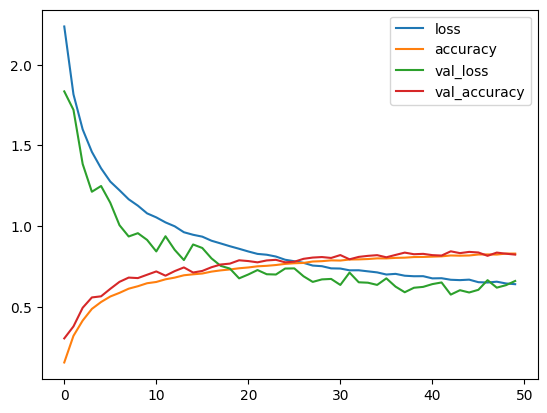

In [11]:
pd.DataFrame(history.history).plot()

# **Menampilkan laporan klasifikasi**

In [12]:
scores = model.evaluate(X_test, y_test)
pred = model.predict(X_test)
labels = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
y_pred = np.argmax(pred, axis=1)
y_true = np.argmax(y_test, axis=1)
errors = y_pred - y_true != 0
print(classification_report(y_true, y_pred))

313/313 [==============================] - 1s 4ms/step
              precision    recall  f1-score   support

           0       0.90      0.77      0.83      1000
           1       0.92      0.93      0.93      1000
           2       0.80      0.72      0.76      1000
           3       0.81      0.50      0.62      1000
           4       0.71      0.84      0.77      1000
           5       0.79      0.73      0.76      1000
           6       0.70      0.96      0.81      1000
           7       0.86      0.89      0.87      1000
           8       0.90      0.91      0.91      1000
           9       0.86      0.92      0.89      1000

    accuracy                           0.82     10000
   macro avg       0.82      0.82      0.81     10000
weighted avg       0.82      0.82      0.81     10000



# **Menampilkan visualisasi hasil prediksi**

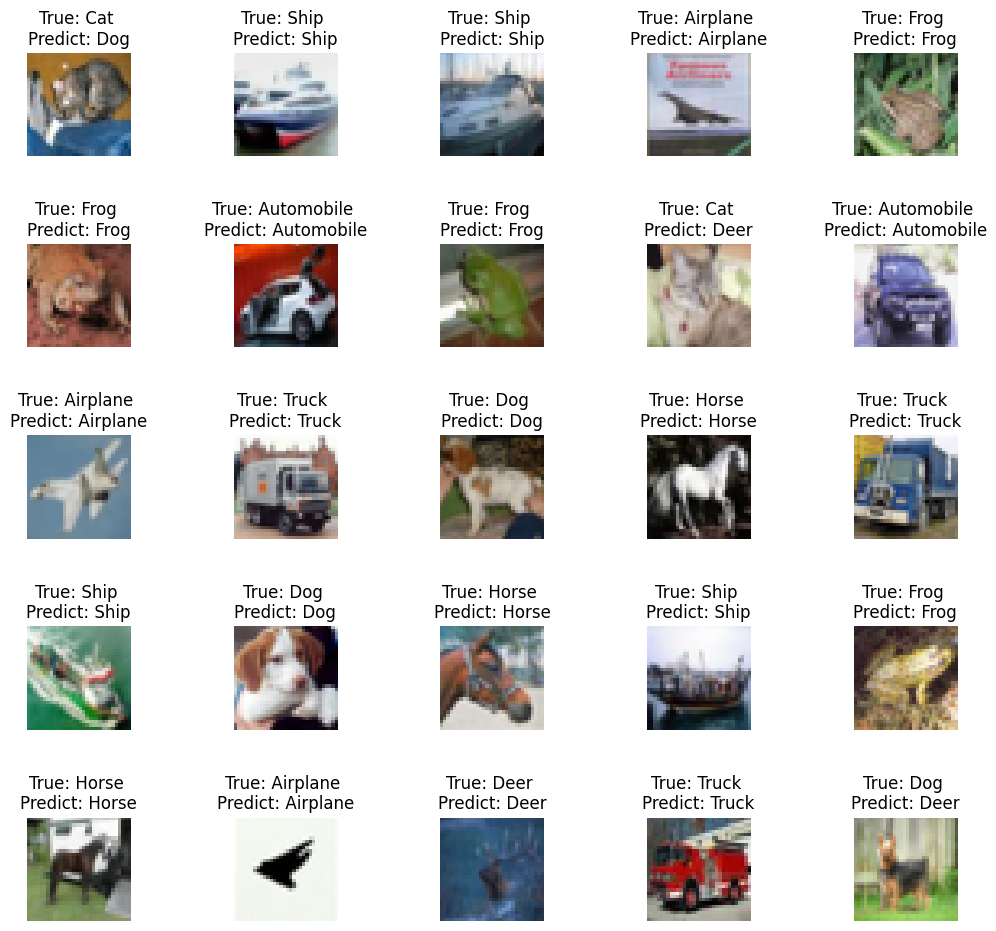

In [13]:
fig, axes = plt.subplots(5, 5, figsize=(12,12))
axes = axes.ravel()
for i in np.arange(25):
    axes[i].imshow(X_test[i])
    axes[i].set_title('True: %s \nPredict: %s' % (labels[y_true[i]], labels[y_pred[i]]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)



---



# **2. Buatlah model CNN untuk klasifikasi dataset MNIST.**



---



# **Memuat Dataset MNIST**

In [15]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist

# Memuat dataset MNIST
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


# **Normalisasi Gambar ke Rentang [0, 1]**

In [16]:
# Normalisasi gambar ke rentang [0, 1]
train_images, test_images = train_images / 255.0, test_images / 255.0

# **Mengonversi Label ke Format One-Hot Encoding**

In [17]:
# Perbaikan: Mengimpor to_categorical dari tensorflow.keras.utils
from tensorflow.keras.utils import to_categorical

# Mengonversi label ke format one-hot encoding
train_labels = to_categorical(train_labels, num_classes=10)
test_labels = to_categorical(test_labels, num_classes=10)

# **Menampilkan Informasi tentang Dataset**

In [18]:
# Menampilkan informasi tentang dataset
print("Jumlah data latihan:", len(train_images))
print("Jumlah data pengujian:", len(test_images))
print("Ukuran gambar:", train_images[0].shape)

Jumlah data latihan: 60000
Jumlah data pengujian: 10000
Ukuran gambar: (28, 28)


# **Membangun Model**

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Membangun model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

# **Mengompilasi Model**

In [20]:
# Mengompilasi model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# **Menampilkan Ringkasan Model**

In [21]:
# Menampilkan ringkasan model
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dense_4 (Dense)             (None, 128)              

# **Melatih Model**

In [22]:
# Melatih model
history = model.fit(train_images, train_labels, epochs=10, batch_size=128, verbose=2, validation_split=0.3)

Epoch 1/10
329/329 - 5s - loss: 0.3975 - accuracy: 0.8765 - val_loss: 0.0900 - val_accuracy: 0.9720 - 5s/epoch - 14ms/step
Epoch 2/10
329/329 - 2s - loss: 0.1015 - accuracy: 0.9699 - val_loss: 0.0609 - val_accuracy: 0.9818 - 2s/epoch - 6ms/step
Epoch 3/10
329/329 - 2s - loss: 0.0743 - accuracy: 0.9782 - val_loss: 0.0530 - val_accuracy: 0.9842 - 2s/epoch - 6ms/step
Epoch 4/10
329/329 - 2s - loss: 0.0569 - accuracy: 0.9826 - val_loss: 0.0497 - val_accuracy: 0.9853 - 2s/epoch - 5ms/step
Epoch 5/10
329/329 - 2s - loss: 0.0444 - accuracy: 0.9870 - val_loss: 0.0440 - val_accuracy: 0.9868 - 2s/epoch - 5ms/step
Epoch 6/10
329/329 - 2s - loss: 0.0374 - accuracy: 0.9886 - val_loss: 0.0416 - val_accuracy: 0.9882 - 2s/epoch - 5ms/step
Epoch 7/10
329/329 - 2s - loss: 0.0318 - accuracy: 0.9904 - val_loss: 0.0450 - val_accuracy: 0.9876 - 2s/epoch - 6ms/step
Epoch 8/10
329/329 - 2s - loss: 0.0285 - accuracy: 0.9909 - val_loss: 0.0508 - val_accuracy: 0.9857 - 2s/epoch - 7ms/step
Epoch 9/10
329/329 - 2s

# **Visualisasi History**

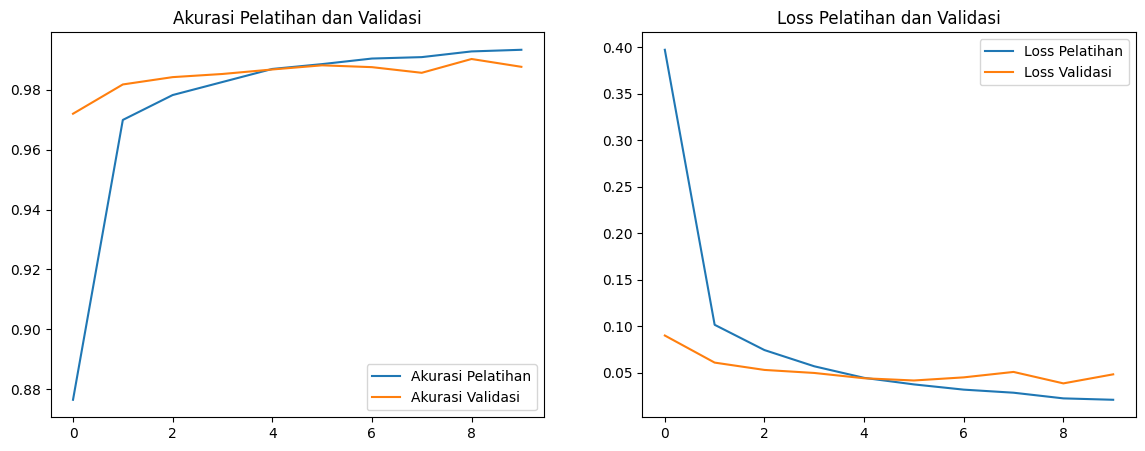

In [23]:
import matplotlib.pyplot as plt

# Plot sejarah pelatihan
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Akurasi Pelatihan')
plt.plot(history.history['val_accuracy'], label='Akurasi Validasi')
plt.legend(loc='lower right')
plt.title('Akurasi Pelatihan dan Validasi')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Loss Pelatihan')
plt.plot(history.history['val_loss'], label='Loss Validasi')
plt.legend(loc='upper right')
plt.title('Loss Pelatihan dan Validasi')

plt.show()

# **Evaluasi Model pada Kumpulan Data Uji**

In [24]:
# Evaluasi model pada kumpulan data uji
validation_loss, validation_accuracy = model.evaluate(test_images, test_labels, verbose=False)
print("Loss Validasi:", validation_loss)
print("Akurasi Validasi:", validation_accuracy)

Loss Validasi: 0.03283116593956947
Akurasi Validasi: 0.989799976348877


# **Menghasilkan Nilai Prediksi pada Kumpulan Data Uji**

In [25]:
# Menghasilkan nilai prediksi pada kumpulan data uji
y_pred_enc = model.predict(test_images)

313/313 [==============================] - 1s 3ms/step


# **Mendekode Nilai Prediksi**

In [26]:
# Mendekode nilai prediksi
y_pred = [np.argmax(i) for i in y_pred_enc]

# **Menampilkan Laporan Klasifikasi**

In [27]:
# Menampilkan laporan klasifikasi
print(classification_report(np.argmax(test_labels, axis=1), y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.98      1.00      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.98      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.98      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



# **Membuat Matriks Konfusi dan Menampilkannya dengan Heatmap**

Text(58.222222222222214, 0.5, 'Aktual')

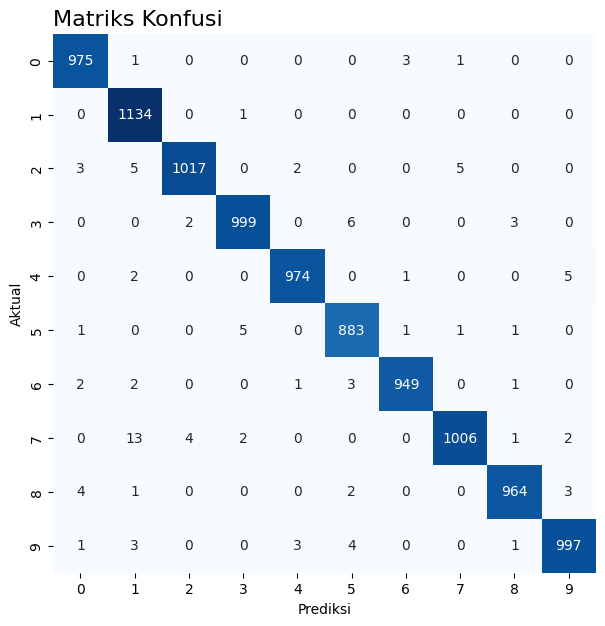

In [28]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Membuat matriks konfusi dan menampilkannya dengan heatmap
fig, ax = plt.subplots(figsize=(7, 7))
sns.heatmap(confusion_matrix(np.argmax(test_labels, axis=1), y_pred), annot=True, cbar=False, fmt='1d', cmap='Blues', ax=ax)
ax.set_title('Matriks Konfusi', loc='left', fontsize=16)
ax.set_xlabel('Prediksi')
ax.set_ylabel('Aktual')

# **Menampilkan Target yang Diprediksi pada Setiap Gambar (Label di atas gambar adalah label yang diprediksi)**

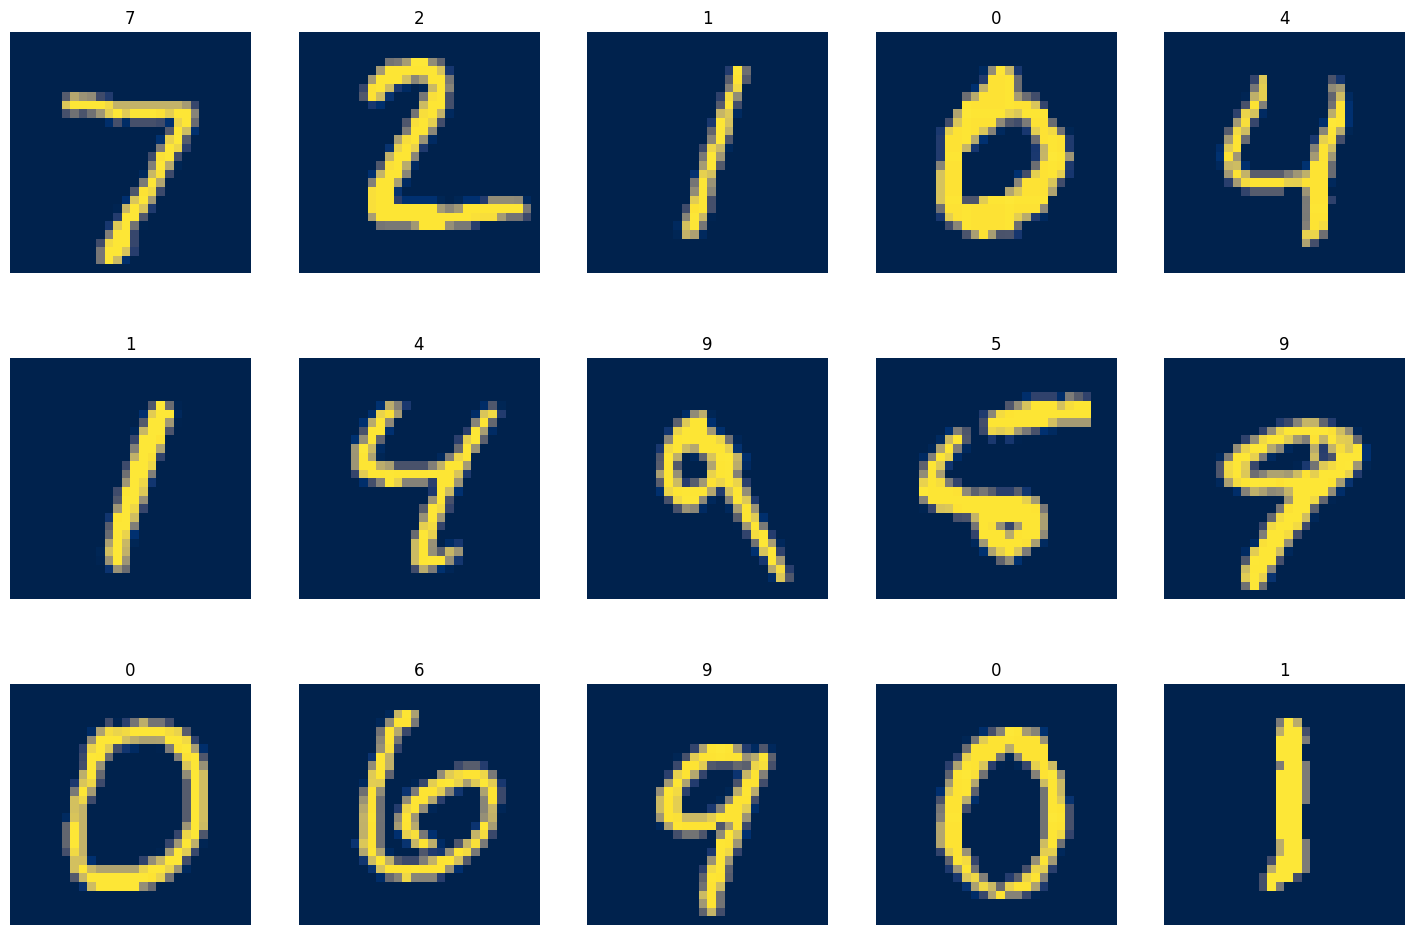

In [29]:
# Menampilkan target yang diprediksi pada setiap gambar
# (label di atas gambar adalah label yang diprediksi)
plt.figure(figsize=(18, 12))
for ind, row in enumerate(test_images[:15]):
    plt.subplot(3, 5, ind+1)
    plt.title(y_pred[ind])
    img = row.reshape(28, 28)
    plt.axis('off')
    plt.imshow(img, cmap='cividis')